In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import pearsonr
import sys
sys.path.append('../')
from helpers import *
from analysis_helper import *
import seaborn as sns

In [2]:
data_path = './../../../data'
advocate_dir = os.path.join(data_path, 'BeerAdvocate')
exp_categories = get_exp_categories(data_path) + ['expertness_score']
rev_with_scores = pd.read_pickle(os.path.join(advocate_dir, 'rev_w_scores.pkl'))
rev_with_scores['date'] = pd.to_datetime(rev_with_scores['date'])

adv_beers = pd.read_csv(os.path.join(advocate_dir, 'beers_BA_clean.csv'))
users = pd.read_csv(os.path.join(advocate_dir, 'users_BA_clean.csv'))

Text(0.5, 1.0, 'Expertness Score Over Time')

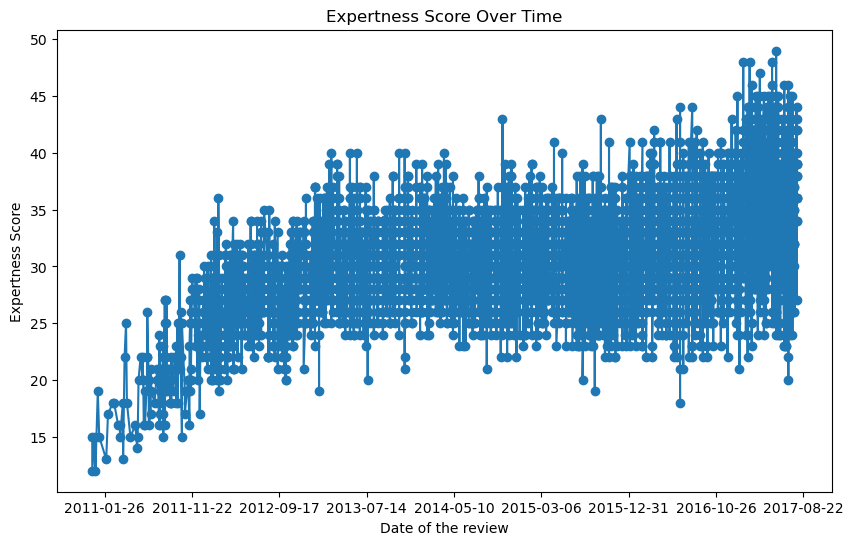

In [4]:
# Pick specific example
rev_with_scores = rev_with_scores[( rev_with_scores['user_id'] =='superspak.456300')]

sorted_data = rev_with_scores.sort_values(by='date', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(sorted_data['date'], sorted_data['expertness_score'], marker='o', color="#1f77b4")
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
ax.set_xlabel("Date of the review")
ax.set_ylabel("Expertness Score")
ax.set_title("Expertness Score Over Time")

In [5]:
rev_with_scores.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance_rt,...,review,lang_tag,stems,flavor,mouthfeel,brewing,technical,appearance,off_flavors,expertness_score
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20,nmann08,nmann08.184925,3.25,...,True,en,"[floral, fizzi, straw, yellow, carbon, earthi,...",2,2,2,0,2,1,9
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20,StJamesGate,stjamesgate.163714,3.00,...,True,en,"[copper, dri, thin, caramel, grassi, hop, dark...",4,2,3,0,2,1,12
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13,mdagnew,mdagnew.19527,4.00,...,True,en,"[pepperi, fruiti, spici, thick, burnt, breadi,...",11,6,2,1,2,1,23
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01,helloloser12345,helloloser12345.10867,4.00,...,True,en,"[hay, bitter, cloudi, balanc, lace, hoppi, subtl]",4,0,0,1,2,0,7
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30,cypressbob,cypressbob.3708,4.00,...,True,en,"[floral, tan, malt, bodi, balanc, hop, hoppi, ...",2,1,2,1,4,0,10


In [6]:

scores_for_beer = get_scores_for_beers(rev_with_scores, exp_categories)


In [7]:
scores_for_beer

review_count    flavor            mouthfeel             brewing  \
               count      mean        std      mean       std      mean   
beer_id                                                                   
3                  3  4.666667   0.577350  2.000000  1.000000  1.666667   
4                 10  4.600000   2.503331  3.000000  1.154701  1.800000   
5                543  2.661142   1.781232  1.797422  1.318137  1.246777   
6               1019  4.253189   2.245860  2.000981  1.450899  1.210991   
7                811  1.861899   1.549406  1.596794  1.366780  1.162762   
...              ...       ...        ...       ...       ...       ...   
292902             2  5.500000   0.707107  4.000000  1.414214  2.000000   
292909             2  5.000000   1.414214  3.000000  1.414214  1.500000   
292983             2  7.500000  10.606602  2.000000  2.828427  0.500000   
292990             3  1.333333   2.309401  0.333333  0.577350  1.333333   
293279             2  7.000000   0.000000  4.000000  0.000000  1.500000   

                  technical           appearance           off_flavors  \
              std      mean       std       mean       std        mean   
beer_id                                                                  
3        0.577350  1.666667  0.577350   2.000000  1.000000    0.000000   
4        1.135292  1.500000  1.269296   3.200000  1.686548    1.100000   
5        0.928169  1.132597  1.215257   2.267035  1.251036    0.414365   
6        0.955615  1.091266  1.183761   2.409225  1.491414    0.387635   
7        0.977851  0.890259  1.091625   1.875462  1.309237    0.446363   
...           ...       ...       ...        ...       ...         ...   
292902   0.000000  2.500000  0.707107   2.000000  0.000000    0.500000   
292909   0.707107  1.500000  0.707107   1.500000  0.707107    0.500000   
292983   0.707107  0.500000  0.707107   2.000000  1.414214    0.000000   
292990   0.577350  1.000000  0.000000   0.333333  0.577350    0.000000   
293279   0.707107  3.000000  0.000000   3.500000  2.121320    0.500000   

                  expertness_score             
              std             mean        std  
beer_id                                        
3        0.000000        12.000000   3.000000  
4        0.737865        15.200000   5.432413  
5        0.630948         9.519337   4.569582  
6        0.622029        11.353288   5.260112  
7        0.685310         7.833539   4.327707  
...           ...              ...        ...  
292902   0.707107        16.500000   2.121320  
292909   0.707107        13.000000   2.828427  
292983   0.000000        12.500000  16.263456  
292990   0.000000         4.333333   3.214550  
293279   0.707107        19.500000   2.121320  

[93763 rows x 15 columns]

In [8]:
scores_for_beer.isnull().values.any()

False

In [9]:
mean_scores_beer = get_mean_scores_beer(rev_with_scores, exp_categories)
complete_beer = pd.merge(adv_beers, mean_scores_beer, on='beer_id')

In [10]:
beer_gr =  get_beer_gr(complete_beer, exp_categories)
beer_gr

,flavor,mouthfeel,brewing,technical,appearance,off_flavors,expertness_score
style,,,,,,,
Altbier,3.918748,1.978702,1.584322,1.499825,2.280682,0.418859,11.681137
American Adjunct Lager,1.573171,1.818795,1.461635,1.065544,2.013857,0.686527,8.619529
American Amber / Red Ale,3.895734,1.904081,1.533093,1.323828,2.298991,0.365088,11.320814
American Amber / Red Lager,3.306262,1.882164,1.502879,1.374093,2.278402,0.496647,10.840447
American Barleywine,4.885130,2.111598,1.366418,1.350211,2.083978,0.428452,12.225787
...,...,...,...,...,...,...,...
Vienna Lager,3.384419,2.053328,1.556241,1.455135,2.273939,0.451045,11.174107
Weizenbock,4.684752,2.078791,1.284343,1.303805,2.231585,0.429416,12.012692
Wheatwine,4.759205,2.107349,1.584624,1.281840,2.063184,0.480472,12.276674


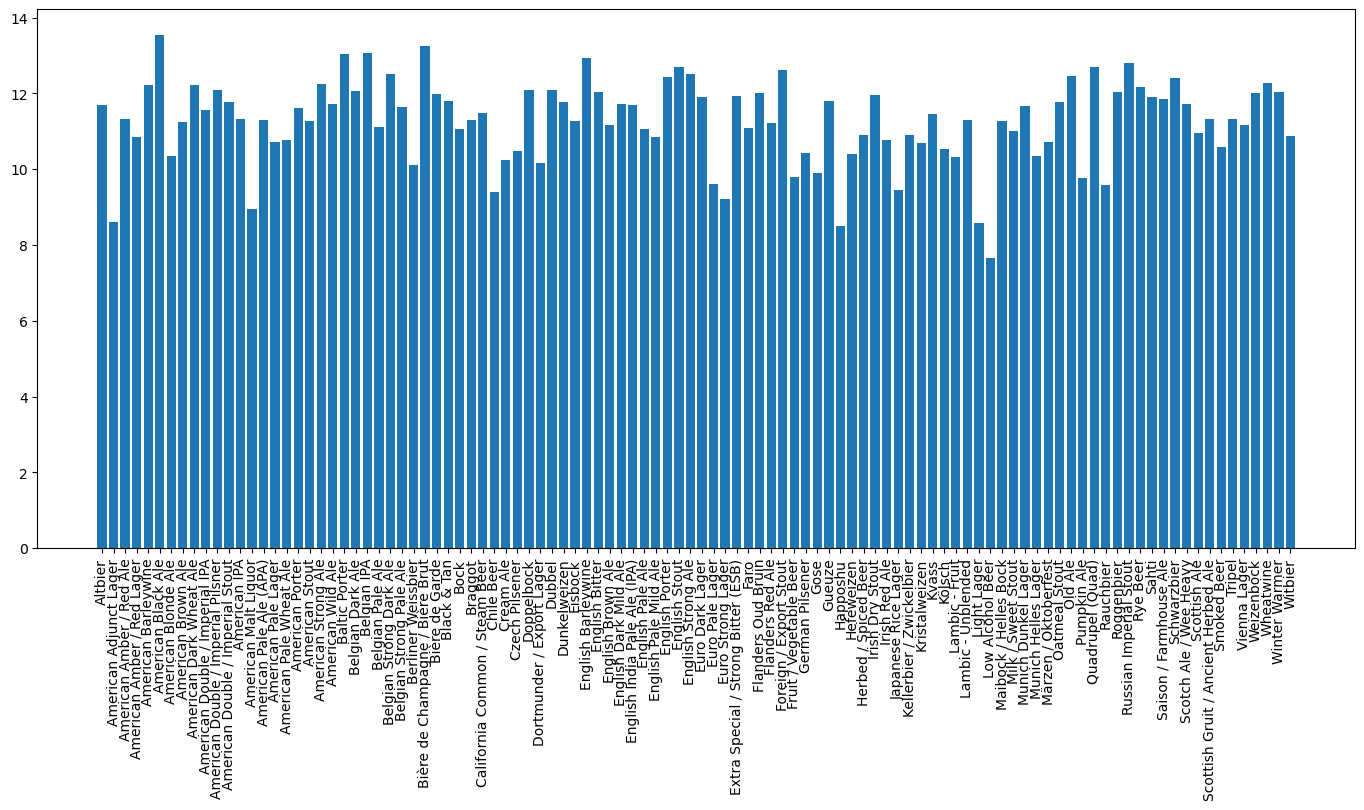

In [11]:
fig  = plt.figure(figsize=(17,7))
plt.bar(beer_gr.index, beer_gr['expertness_score'])

plt.xticks(rotation=90)
plt.show()

In [12]:
mean_scores_beer['review_count'].corr(mean_scores_beer['expertness_score'])

0.022268772604121585

<Axes: >

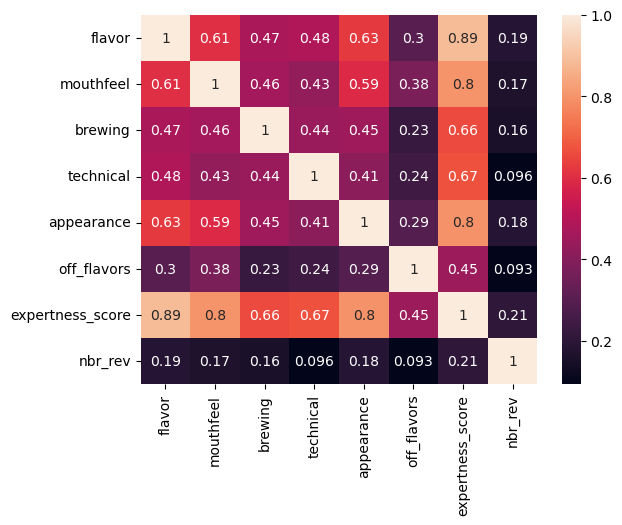

In [13]:
users_stats = get_users_stats(rev_with_scores, exp_categories)
for_corr = exp_categories + ['nbr_rev']
sns.heatmap(users_stats[for_corr].corr(), annot=True)

<Axes: >

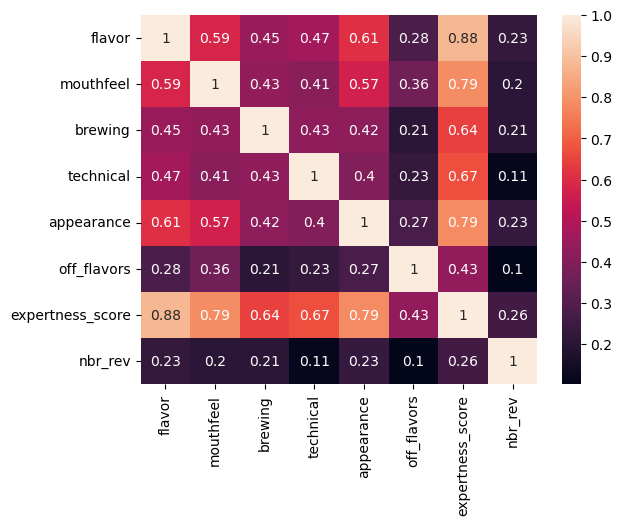

In [14]:
sns.heatmap(users_stats[users_stats['nbr_rev']<200][for_corr].corr(), annot=True)

In [15]:
pearsonr(users_stats['expertness_score'], users_stats['nbr_rev'])

PearsonRResult(statistic=0.20642972721749825, pvalue=0.0)

In [16]:
# Normalizes review dates to the first review date for each user, setting their first review as day zero.
rev_zero_date= joined_date_zero(rev_with_scores)
# Standardize the reviews score through the mean and the std of the scores for that particular beer 
rev_std = standardize(rev_zero_date, scores_for_beer.reset_index(), exp_categories)

result = rev_std.groupby('user_id').apply(corr_and_count, include_groups=False)

result = result.dropna()
result

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:134: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:134: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:134: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value 

,correlation,p_value,total_count
user_id,,,
--dom--.709199,-0.416737,0.001909,53.0
-mk-.763762,-0.295046,0.478056,8.0
-rick.912339,0.271793,0.000126,194.0
-steve-.781156,0.343135,0.037602,37.0
007.8521,-0.172686,0.781227,5.0
...,...,...,...
zymurgylabs.718885,0.000000,1.000000,2.0
zymurgywhiz.265202,0.000000,1.000000,2.0
zythophile.1101219,0.144038,0.053051,181.0


In [17]:
result[(result['total_count'] > 20) & (result['total_count'] < 500)]['correlation'].mean()

0.06387413128614076

In [18]:
result['correlation'].mean()

0.03655253978223655

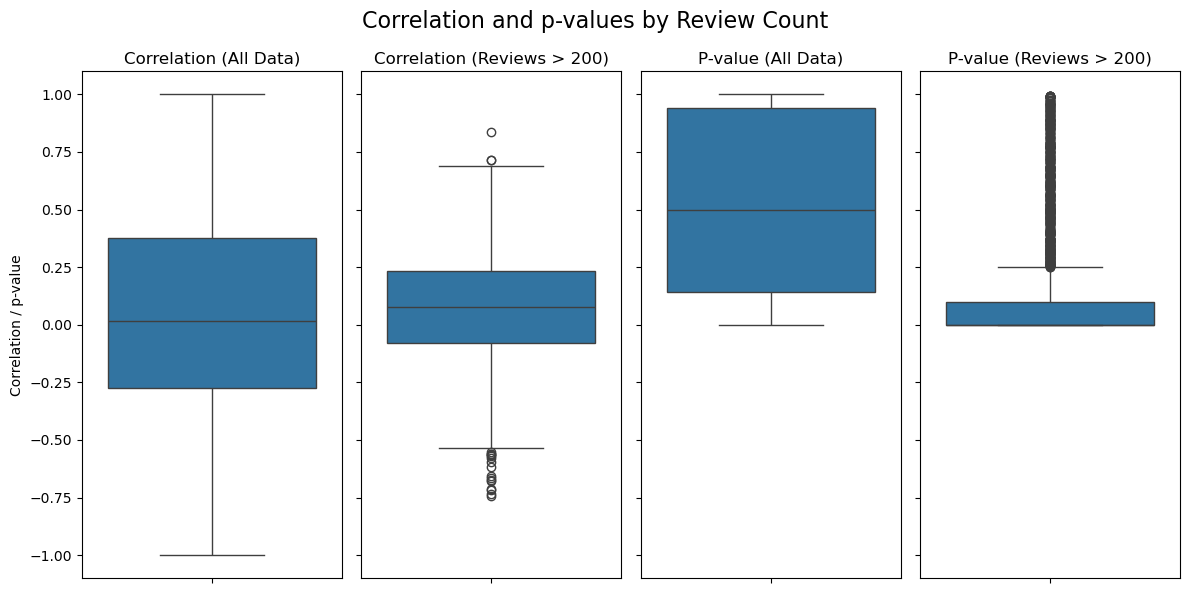

In [19]:
plot_corr_and_pvalue(result)

In [27]:
def review_of_experts(df, users, nbr_rev=100):
    x = df.merge(users[['user_id','nbr_ratings']], on='user_id')
    return x[x['nbr_ratings']>nbr_rev]

In [28]:
len(users[users['nbr_ratings']>200])

5234

In [29]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=100)
rev_exp_zero_date= joined_date_zero(rev_of_exp)

rev_exp_std = standardize(rev_exp_zero_date, scores_for_beer.reset_index(), exp_categories)
result = rev_exp_std.groupby('user_id').apply(corr_and_count, include_groups=False)

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:134: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:134: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:134: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value 

In [30]:
result = result.dropna()

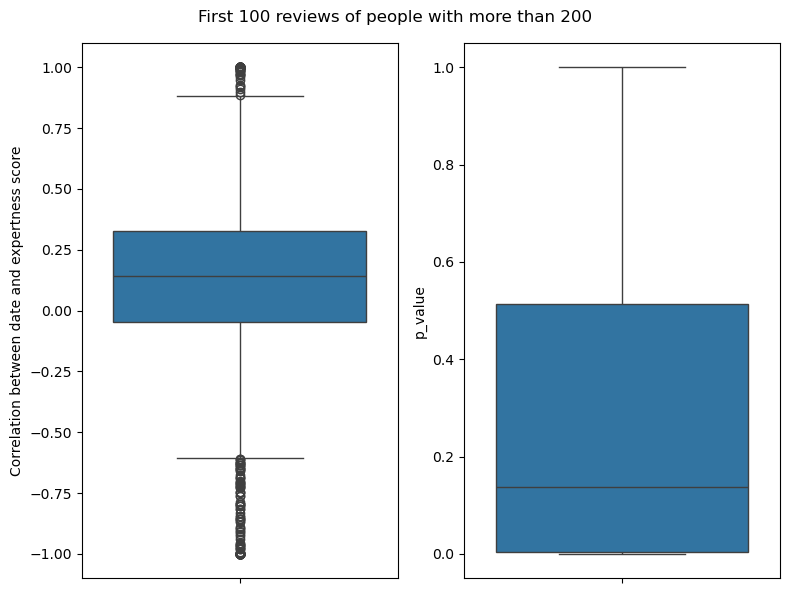

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6)) 

fig.suptitle('First 100 reviews of people with more than 200')

sns.boxplot(y=result['correlation'], ax=axes[0])

axes[0].set_ylabel("Correlation between date and expertness score")

sns.boxplot(y=result['p_value'], ax=axes[1])
axes[1].set_ylabel("p_value")

plt.tight_layout()  
plt.show()


In [32]:
result['correlation'].mean()

0.12593460603574574

In [33]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=5)

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews of people with more than 200')

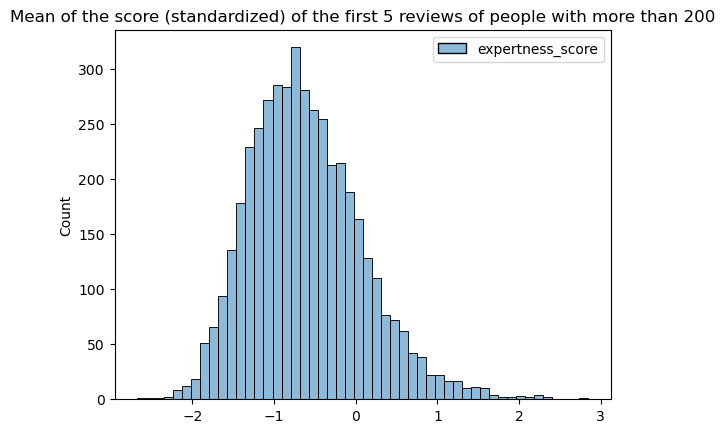

In [34]:
rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), exp_categories)
rev_exp_std_grouped = rev_exp_std.groupby('user_id')[['expertness_score']].agg('mean')
sns.histplot(rev_exp_std_grouped)
plt.title('Mean of the score (standardized) of the first 5 reviews of people with more than 200')

In [35]:
no_already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score']<-0.5].index

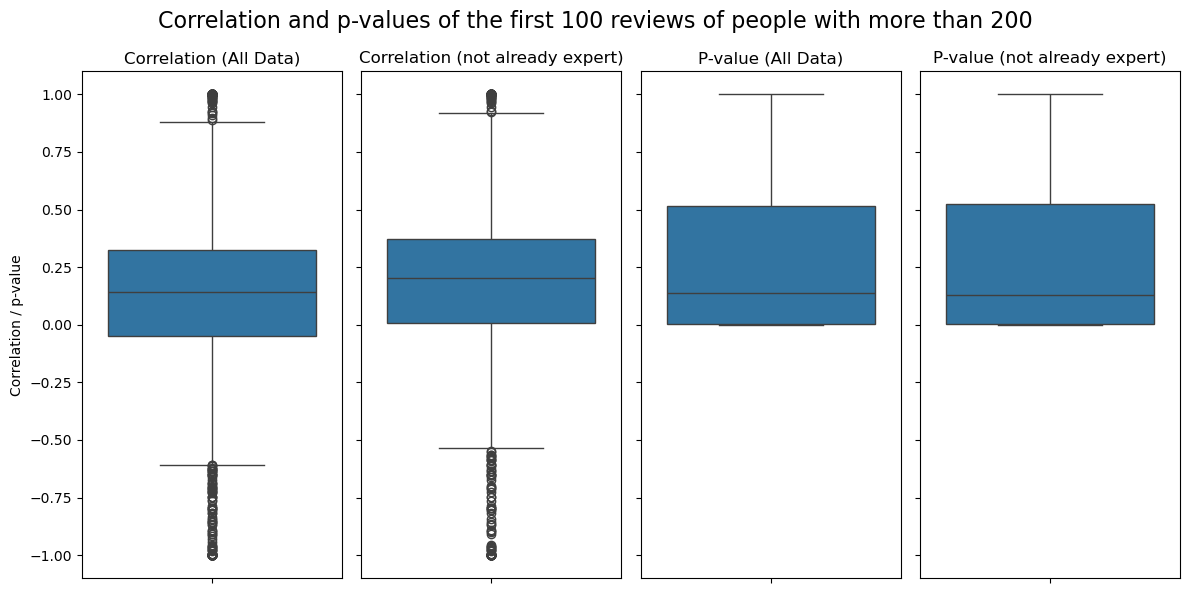

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle("Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [37]:
result[result.index.isin(no_already_experts)].correlation.mean()

0.17502191732341887

In [38]:
result[result.index.isin(no_already_experts)].p_value.describe()

count    2.483000e+03
mean     2.850683e-01
std      3.286540e-01
min      3.955244e-22
25%      3.016280e-03
50%      1.287995e-01
75%      5.223308e-01
max      1.000000e+00
Name: p_value, dtype: float64

__Using and incremental count instead of the date__

In [39]:

rev_exp_std = standardize(rev_with_scores, scores_for_beer.reset_index(), exp_categories)


/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


In [40]:
result_rep_date = rev_exp_std.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:134: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))


In [41]:
len(result_rep_date)

38673

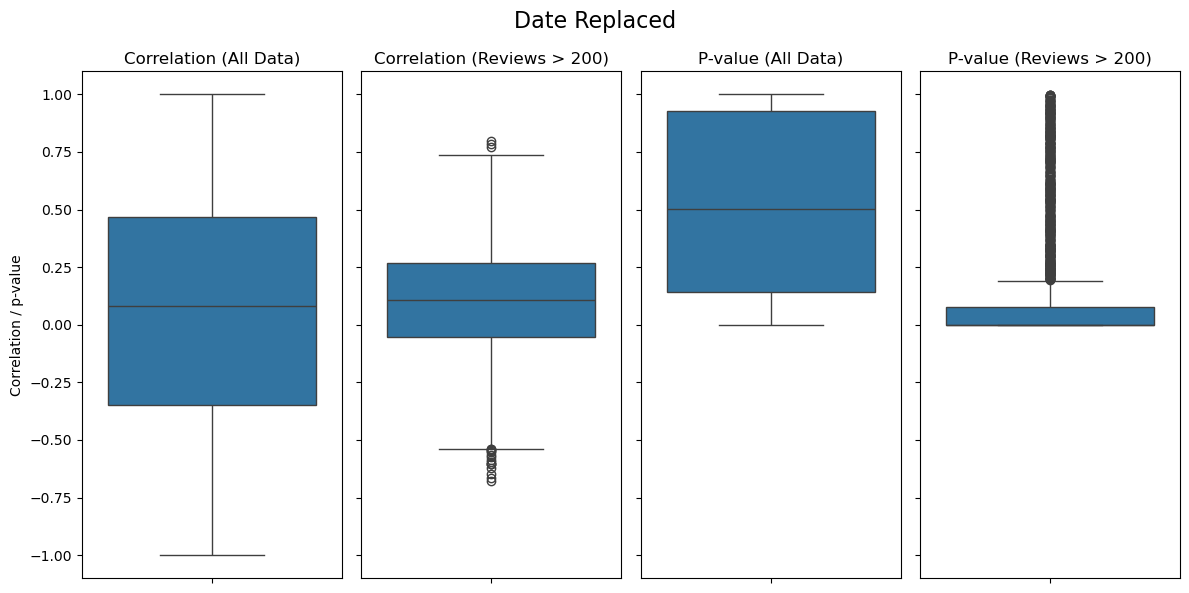

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle('Date Replaced', fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (Reviews > 200)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['p_value'], ax=axes[3])
axes[3].set_title("P-value (Reviews > 200)")


plt.tight_layout()  
plt.show()

In [43]:
result_rep_date[(result_rep_date['total_count'] > 20) & (result_rep_date['total_count'] < 500)]['correlation'].mean()

0.09753528305557851

In [44]:
result_rep_date['correlation'].mean()

0.04620449855754754

In [45]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=100)

rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), exp_categories)
result_rep_date = rev_exp_std.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_metric/../analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


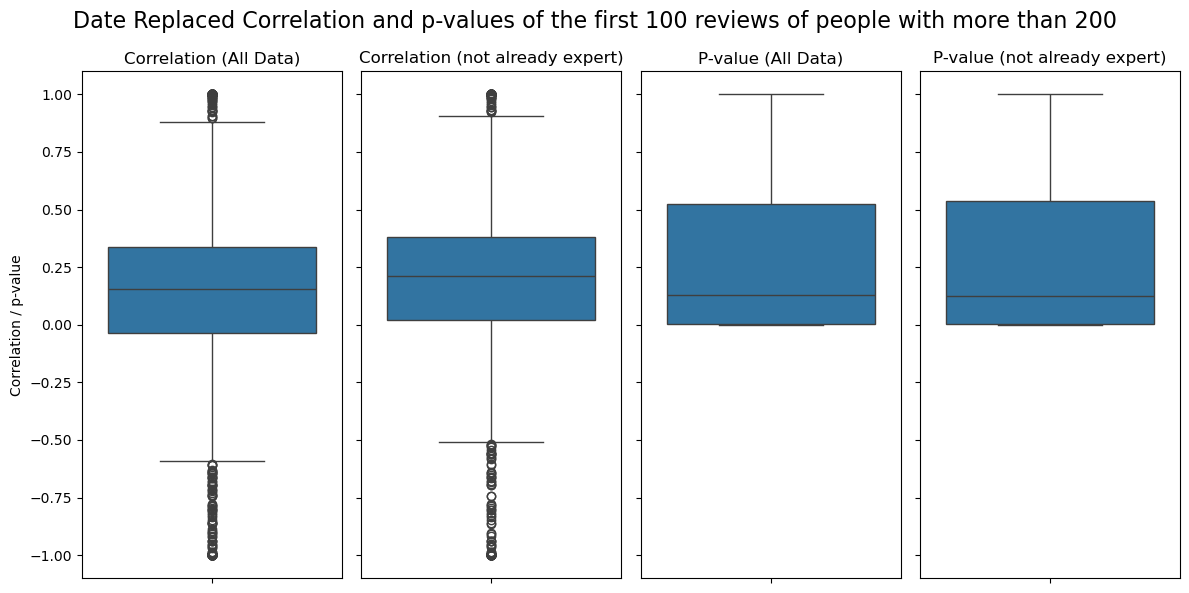

In [46]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True) 


fig.suptitle("Date Replaced Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [47]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].correlation.mean()

0.18618285968104104

In [48]:
result_rep_date.correlation.mean()

0.13578833318920486

In [49]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].p_value.describe()

count    2.492000e+03
mean     2.876217e-01
std      3.329890e-01
min      6.741944e-27
25%      2.906302e-03
50%      1.233672e-01
75%      5.361995e-01
max      1.000000e+00
Name: p_value, dtype: float64